In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
def readData(filename):
    df = pd.read_csv(filename)
    return df.values

x = readData('linearX.csv')
y = readData('linearY.csv')

x = x.reshape((99,))
y = y.reshape((99,))

In [23]:
print(x.shape)
print(y.shape)

(99,)
(99,)


In [24]:
print(x)
print(y)

[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]
[0.99007 0.99769 0.99386 0.99508 0.9963  1.0032  0.99768 0.99584 0.99609
 0.99774 1.0003  0.99694 0.99965 0.99549 0.99364 0.99378 0.99379 0.99524
 0.9988  0.99733 0.9966  0.9955  0.99471 0.99354 0.99786 0.9965  0.9988
 0.9964  0.99713 0.9985  0.99565 0.99578 0.9976  1.0014  0.99685 0.99648
 0.99472 0.99914 0.99408 0.9974  1.0002  0.99402 0.9966  0.99402 1.0029
 0.99718 0.9986  0.9952  0.9952  0.9972  0.9976  0.9968  0.9978  0.9951
 0.99629 0.99656 0.999   0.99836 0.99396 0.99387 1.0004  0.99

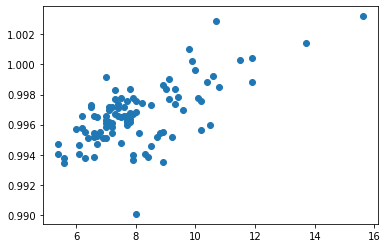

In [25]:
### Plot the data
#a = [1,2,3]
#b = [10,20,30]
#plt.scatter(a,b)
plt.scatter(x,y)
plt.show()

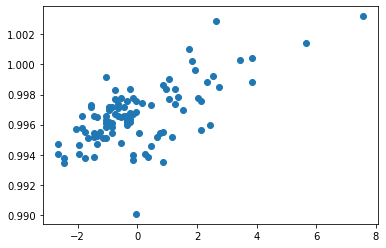

In [31]:
# Normalization
x = x-x.mean()/(x.std())
plt.scatter(x,y)

X = x

Y = y

 ### Algorithm - Linear Regression !

In [66]:
def hypothesis(theta,x):
    return theta[0] + theta[1]*x

def error(X,Y, theta):
    total_error = 0
    m = X.shape[0]
    
    for i in range(m):
        total_error += (Y[i] - hypothesis(theta, X[i]))**2
        
    return 0.5*total_error

def gradient(Y,X,theta):
    grad = np.array([0.0,0.0])
    m = X.shape[0]
    for i in range(m):
        grad[0] += -1*(Y[i] - hypothesis(theta,X[i]))
        grad[1] += -1*(Y[i] - hypothesis(theta,X[i]))*X[i]
    return grad

def gradientDescent(X,Y,learning_rate, maxItr):
    grad = np.array([0.0, 0.0])
    theta = np.array([0.0,0.0])
    e = []
    
    for i in range(maxItr):
        grad = gradient(Y,X,theta)
        ce = error(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        e.append(ce)
        print(ce)
    return theta, e 

theta,e = gradientDescent(X,Y,learning_rate=0.001,maxItr=100)
print(theta[0], theta[1])

49.16754909500004
39.91425870950065
32.40244285994534
26.304350450600904
21.353916509321465
17.335151057914185
14.0727141246352
11.42426499559236
9.27425156029656
7.528868610670295
6.111965039917162
4.9617213306243775
4.027952350241778
3.2699177646766007
2.654544533292575
2.1549839302746774
1.7494401339739905
1.4202192749849498
1.152957452630993
0.935994038078527
0.7598629212291702
0.6168795044634229
0.5008054237613134
0.40657636897908217
0.3300811280806986
0.267982215025581
0.217570255309233
0.1766457759998942
0.14342324277226812
0.11645315707563468
0.09455881453706487
0.07678496536993275
0.062356136842216255
0.05064279941459262
0.041133900377513126
0.03341456663031414
0.027148003775004804
0.022060801782502176
0.017931006117786866
0.014578433867375338
0.011856812361918928
0.009647397302168032
0.007853791947247153
0.006397741326517033
0.0052157179765576715
0.004256150239037401
0.0034771721901506506
0.0028447970310863948
0.0023314342445828365
0.0019146858211364333
0.0015763690342342279


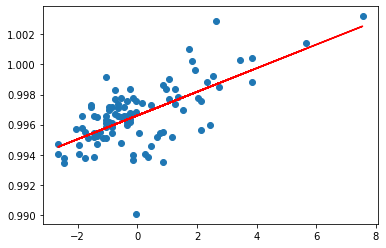

In [63]:
plt.scatter(X,Y)
plt.plot(X,hypothesis(theta,X), color='r')
plt.show()

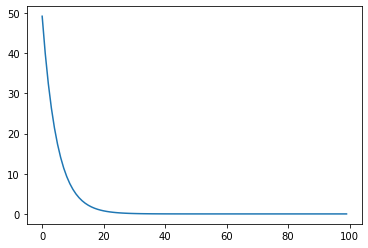

In [67]:
plt.plot(e)
plt.show()

In [68]:
print(e[50])
print(e[99])

0.0015763690342342279
0.00011708463670674526


In [69]:
### Convergence Criteria